Test Accuracy: 0.7674418604651163


<Figure size 800x400 with 0 Axes>

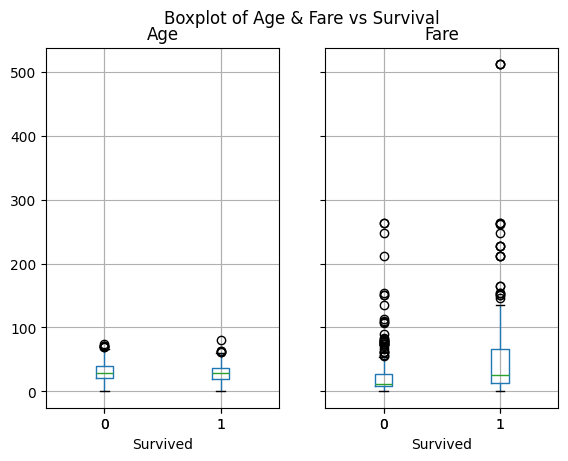

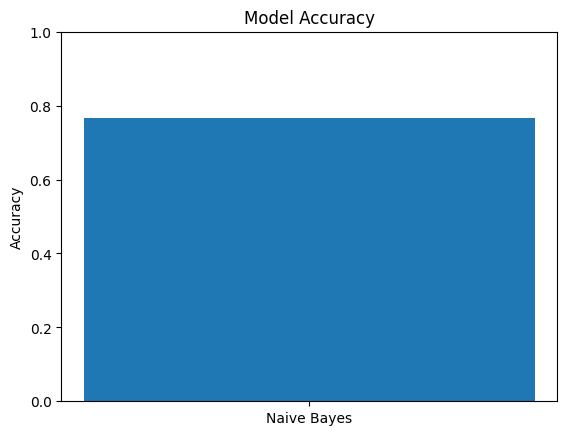

In [1]:
# ============================================================
# Naive Bayes Classifier from Scratch
# Works for mixed Numeric + Categorical Features
# Dataset: Titanic
# No ML Libraries Used
# ============================================================

import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt

# -------------------------------
# 1. Load Dataset
# -------------------------------
data = pd.read_csv("titanic.csv")

# Select useful columns
data = data[['Survived', 'Pclass', 'Sex', 'Age', 'Fare']]
data.dropna(inplace=True)

# Convert categorical features
data['Sex'] = data['Sex'].map({'male': 0, 'female': 1})

# -------------------------------
# 2. Train-Test Split (70-30)
# -------------------------------
np.random.seed(42)
indices = np.random.permutation(len(data))
split = int(0.7 * len(data))

train_idx, test_idx = indices[:split], indices[split:]
train, test = data.iloc[train_idx], data.iloc[test_idx]

X_train = train.drop('Survived', axis=1)
y_train = train['Survived']

X_test = test.drop('Survived', axis=1)
y_test = test['Survived']

# -------------------------------
# 3. Naive Bayes Classifier
# -------------------------------
class NaiveBayes:
    def __init__(self):
        self.class_priors = {}
        self.mean = {}
        self.var = {}
        self.cat_probs = {}

    def fit(self, X, y):
        self.classes = y.unique()
        for cls in self.classes:
            X_c = X[y == cls]
            self.class_priors[cls] = len(X_c) / len(X)

            self.mean[cls] = X_c[['Age', 'Fare']].mean()
            self.var[cls] = X_c[['Age', 'Fare']].var()

            # Laplace smoothing for categorical features
            self.cat_probs[cls] = {}
            for col in ['Pclass', 'Sex']:
                counts = X_c[col].value_counts()
                total = len(X_c)
                self.cat_probs[cls][col] = {}
                for val in X[col].unique():
                    self.cat_probs[cls][col][val] = (counts.get(val, 0) + 1) / (total + len(X[col].unique()))

    def gaussian_log_prob(self, x, mean, var):
        return -0.5 * math.log(2 * math.pi * var) - ((x - mean) ** 2) / (2 * var)

    def predict(self, X):
        predictions = []
        for _, row in X.iterrows():
            class_scores = {}
            for cls in self.classes:
                log_prob = math.log(self.class_priors[cls])

                # Numeric features
                for col in ['Age', 'Fare']:
                    log_prob += self.gaussian_log_prob(
                        row[col],
                        self.mean[cls][col],
                        self.var[cls][col]
                    )

                # Categorical features
                for col in ['Pclass', 'Sex']:
                    log_prob += math.log(self.cat_probs[cls][col][row[col]])

                class_scores[cls] = log_prob

            predictions.append(max(class_scores, key=class_scores.get))
        return predictions

# -------------------------------
# 4. Train Model
# -------------------------------
nb = NaiveBayes()
nb.fit(X_train, y_train)

# -------------------------------
# 5. Evaluate Model
# -------------------------------
y_pred = nb.predict(X_test)
accuracy = np.mean(y_pred == y_test)

print("Test Accuracy:", accuracy)

# -------------------------------
# 6. Boxplot Analysis
# -------------------------------
plt.figure(figsize=(8, 4))
data.boxplot(column=['Age', 'Fare'], by='Survived')
plt.suptitle("Boxplot of Age & Fare vs Survival")
plt.show()

# -------------------------------
# 7. Accuracy Visualization
# -------------------------------
plt.bar(['Naive Bayes'], [accuracy])
plt.ylabel("Accuracy")
plt.title("Model Accuracy")
plt.ylim(0, 1)
plt.show()
